In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
white_wine = pd.read_csv('./winequality-white.csv', sep=';')
# tham so sep dung de bo di dau ;

In [4]:
red_wine = pd.read_csv('./winequality-red.csv', sep=';')

In [5]:
# add a new column wine_type
white_wine['wine_type'] = 'white'
red_wine['wine_type'] = 'red'


In [6]:
# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                     if value <= 5 else 'medium'
                                                     if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low','medium','high'])

In [7]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [8]:
# lambda is a small anonym function
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                     if value <= 5 else 'medium'
                                                     if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low','medium','high'])

In [9]:
# merge red and white wine 
wines = pd.concat([red_wine, white_wine])

In [10]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [11]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,medium


In [12]:
# random data point
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

## reset)index la de sap xep lai chi so index (neu ko co no thi data point van sap xep ngau nhien nhung index
## van ko theo dung thu tu tu` 1 --> tail() )
## drop: Do not try to insert index into dataframe columns. This resets the index to the default integer index.


In [13]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [14]:
# Desciptive Statistics

In [15]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(), 2) # round la ham lam tron so 
ws = round(white_wine[subset_attributes].describe(),2) # lam tron den 2 chu so thap phan
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])


Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [16]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

In [17]:
# UNIVARIATE ANALYSIS

In [18]:
# One of the most effective ways to visualize all numeric data and the distributes, is to leverage 
## histograms using pandas

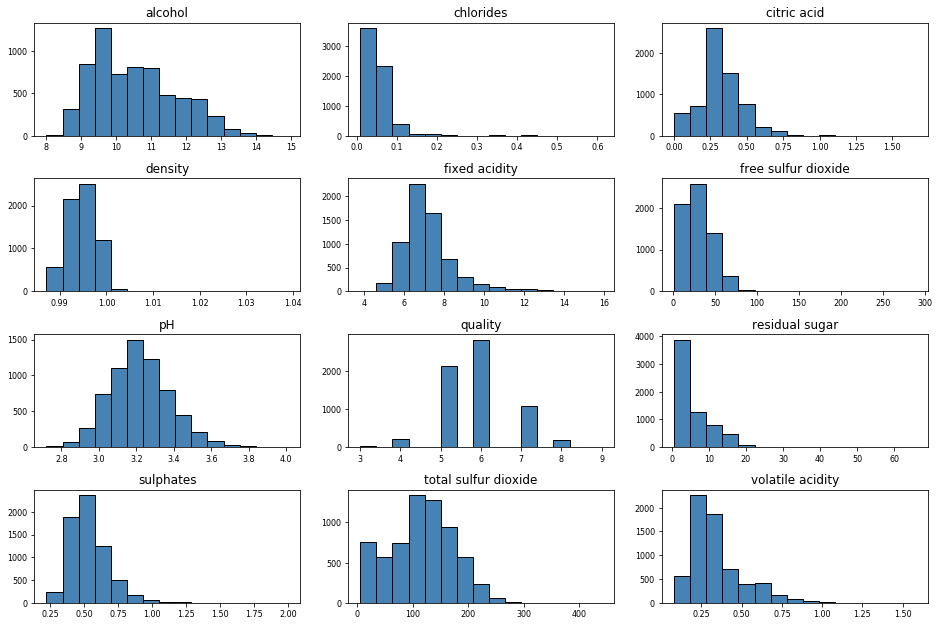

In [19]:
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2.2, 2.2))

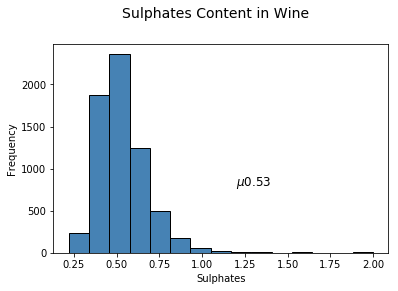

In [20]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$'+str(round(wines['sulphates'].mean(),2)), fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15, edgecolor='black', linewidth=1)



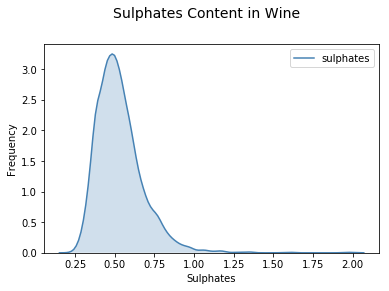

In [21]:
# Density Plot
fig = plt.figure(figsize=(6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel('Sulphates')
ax1.set_ylabel('Frequency')
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

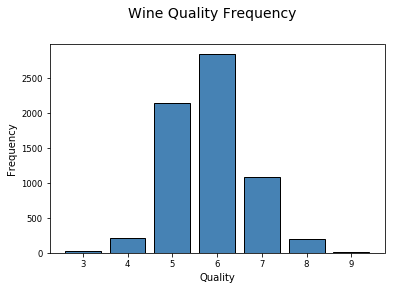

In [22]:
# Bar plot is one of the most effective ways to visulize a discrete, categorical data attribute
# Also, you can use pie-charts but in general try avoiding them altogether, especially when 
# the number of distinct categories is more than three

# bar plot

fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency")
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', edgecolor="black", linewidth=1)

In [23]:
# Multivariate Analysis


In [24]:
# Visualizing data in Two Dimension (2-D)

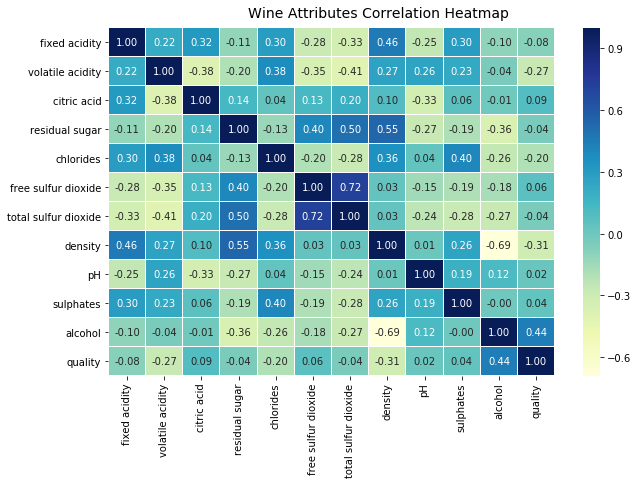

In [25]:
# One of the best ways to check out potential relationships or correlations
# amongs the diffenct data attributes is to leverage a pair-wise correlation
# matrix and depict it as a heatmap

# Correlation Matrix Heatmap

f, ax = plt.subplots(figsize=(10,6))
corr = wines.corr()

# heatmap
hm = sns.heatmap(round(corr, 2), annot=True , ax=ax, cmap='YlGnBu', fmt='.2f', linewidth=.05)
f.subplots_adjust(top=0.93)
# cmap: doi mau cua heatmap
# annot: hien thi gia tri vao moi o
# fmt: kieu dinh dang gia tri dien vao cac o
t = f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

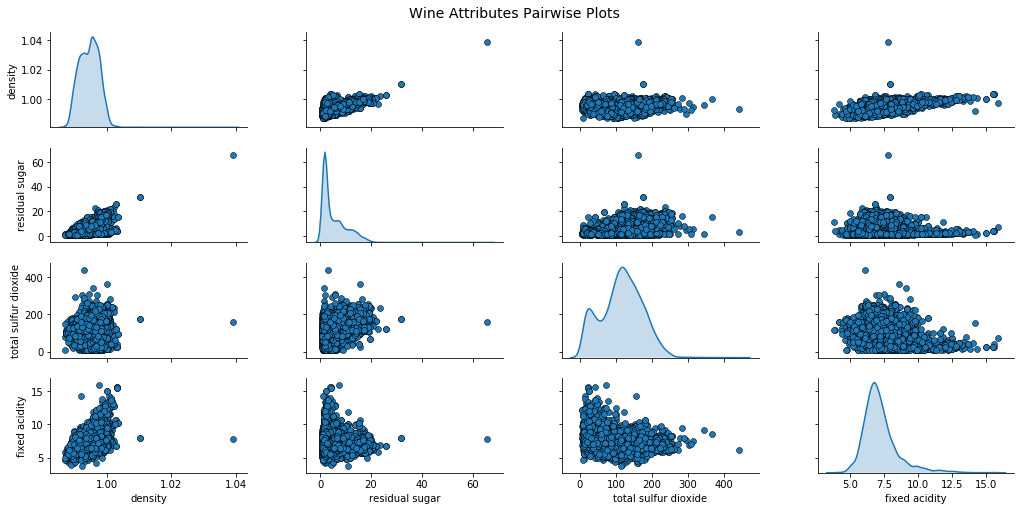

In [26]:
# We can clearly see the strength of the correlation by using pair-wise 
# scatter plots amongs attributes of interest

# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], height=1.8, aspect=2,plot_kws=dict(edgecolor='k', linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))
# aspect: scalar: aspect * height = widget of each facet
# plot_kws: thong so cho tung bieu do
# diag_kind: cac dang plot cho tung subplots
# diag_kws = dict(shade=True): Set thanh False se hieu thong so nay`
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

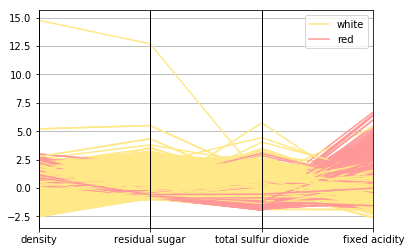

In [27]:
# Another way of visualizing multivariate data is to use parrallel coordinates

# Scalling attribute values to avoid few outliers

cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'wine_type', color=('#FFE888', '#FF9999'))

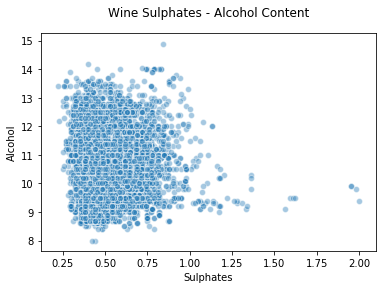

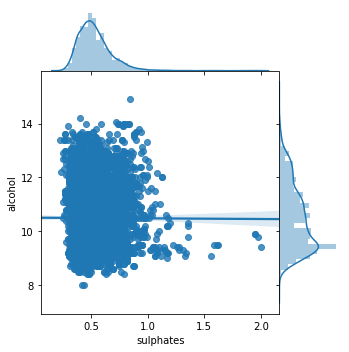

In [28]:
# VISUALIZE TWO ATTRIBUTES
# Scatter plots and joint plots is good for patterns, relationships
# Specially, it's easily to see the individual distributions for the attributes

# Scatter plot
plt.scatter(wines['sulphates'], wines['alcohol'], alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content', y=1.05)

# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines, kind='reg', space=0, height=5, ratio=4)

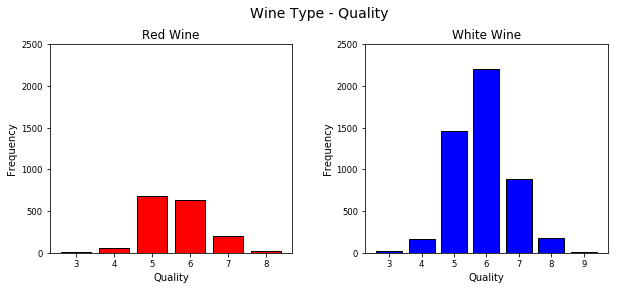

In [29]:
# using subplots of facets along with Bar plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# red wine - wine quality

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel('Quality')
ax1.set_ylabel('Frequency')
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)

# white wine - wine quality
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency")
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='blue', edgecolor='black', linewidth=1)

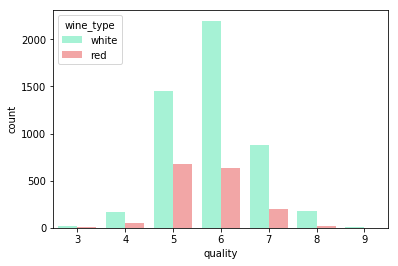

In [30]:
# MULTIPLE BARS
cp = sns.countplot(x='quality', hue='wine_type', data=wines, palette={'red':"#FF9999", "white":"#99ffd8"})

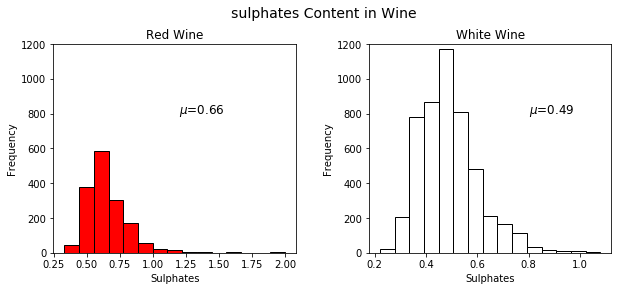

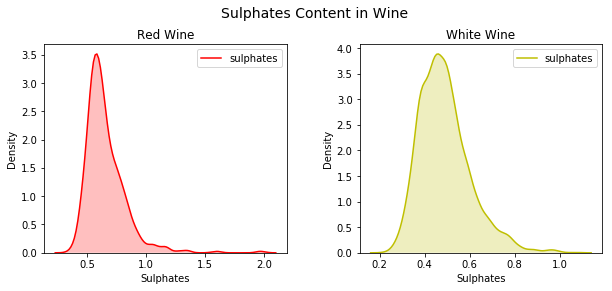

In [31]:
# visualizing mixed attributes in two-dimensions
# One way is to use faceting subplot along with generic histograms or density plots

# facets with histograms
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15, edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel('Sulphates')
ax2.set_ylabel('Frequency')
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15, edgecolor='black', linewidth=1)


#density plots

fig = plt.figure(figsize=(10, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density")
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density")
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')

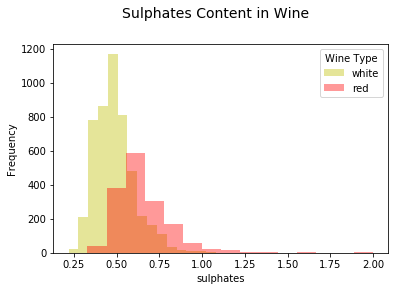

In [32]:
# Lam nhu tren thi tot, co ma co nhieu doan code bi lap lai, ta rut gon lai bang seaborn

fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")

g = sns.FacetGrid(wines, hue='wine_type', palette={"red":"r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax) 
# kde: them duong cong curve vao
ax.legend(title="Wine Type")
plt.close(2)

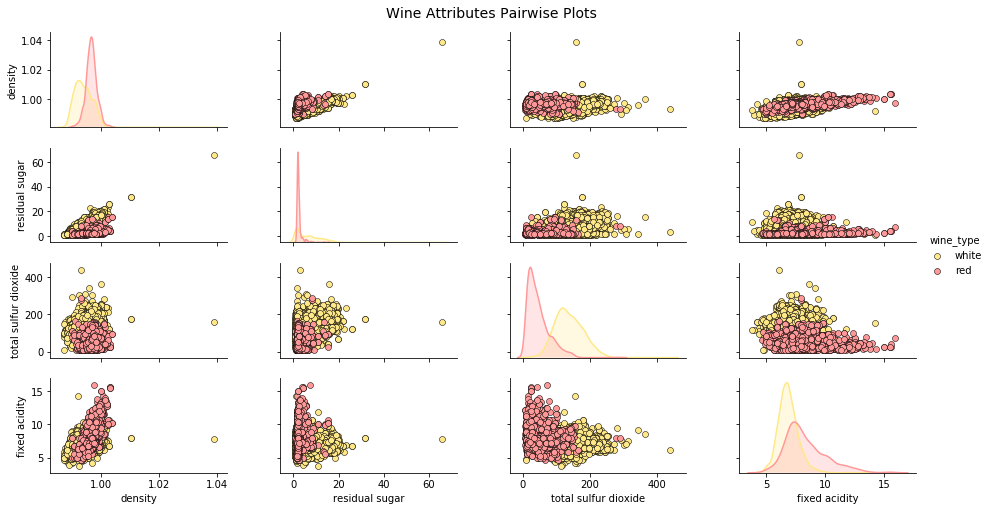

In [33]:
# VISUALIZING DATA IN THREE DIMENSION (3-D)
# Considering three attribute or dimensions in the data
# Scatter Plot with Hue for visualizing data in 3-D

cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']

pp = sns.pairplot(wines[cols], hue='wine_type', height=1.8, aspect=1.8, palette={'red':"#FF9999", 'white':"#FFE888"},
                 plot_kws=dict(edgecolor='black', linewidth=0.5))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle("Wine Attributes Pairwise Plots", fontsize=14)


Text(0.5, 0, 'Alcohol')

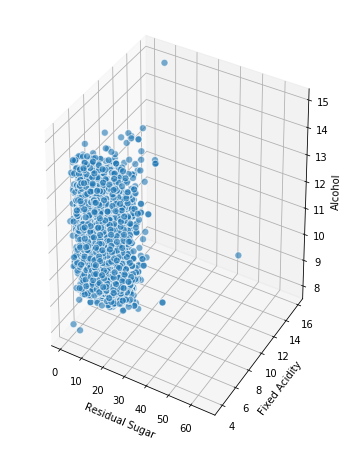

In [34]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth

fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')


Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar')

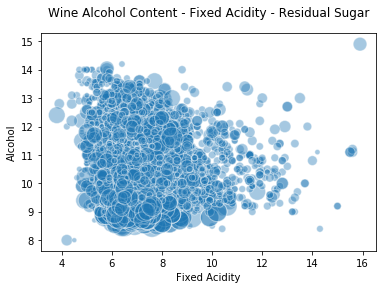

In [35]:
# Visualizing 3-D numeric data with a buble chart
# length, breadth and size
# Chung ta su dung size de mieu ta chieu 3rd ( size of the dots indicate the quantity of the third dimension )
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25, alpha=0.4, edgecolors='w')
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title("Wine Alcohol Content - Fixed Acidity - Residual Sugar", y=1.05)

/home/haipro/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


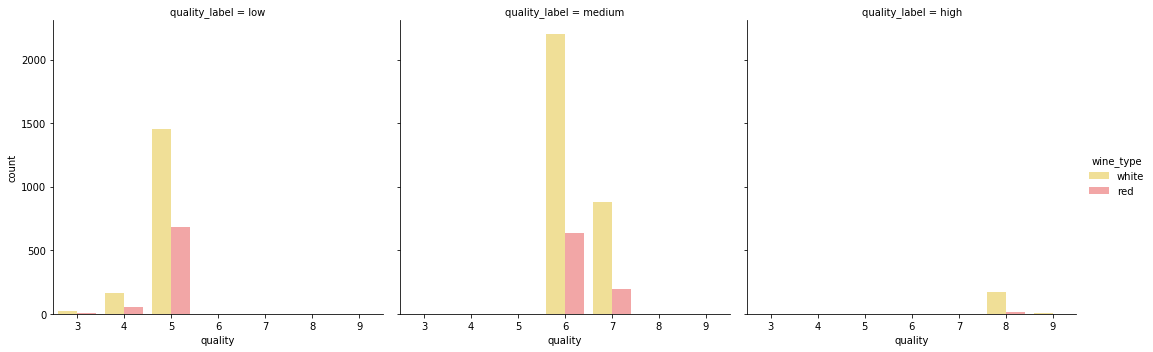

In [36]:
# Visualizing 3-D categorical data using bar plots
# leveraging the concepts of hue and facets
# Chung ta su dung hue cung nhu facets or subplots to support the additional third dimension
fc = sns.factorplot(x='quality', hue='wine_type', col='quality_label', data=wines, kind='count', palette={'red':'#FF9999', 'white':'#FFE888'})

/home/haipro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


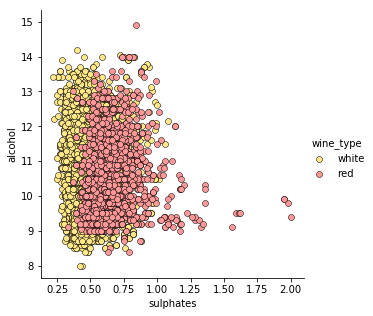

In [37]:
# leveraging the concepts of hue for categorical dimension
jp = sns.pairplot(wines, x_vars=['sulphates'], y_vars=['alcohol'], size=4.5, hue='wine_type', palette={'red':'#FF9999', 'white':'#FFE888'}, plot_kws=dict(edgecolor='k', linewidth=0.5))


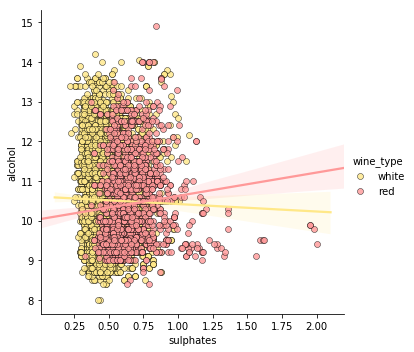

In [38]:
# we can also view relationship \correlations as needed
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', palette={'red':'#FF9999','white':'#FFE888'},
               data=wines, fit_reg=True, legend=True,
               scatter_kws=dict(edgecolor='k', linewidth=0.5))


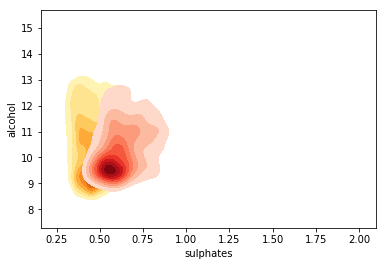

In [39]:
# leveraging the conceppts of hue for categorical dimension
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'], 
                cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'],
                cmap="Reds", shade=True, shade_lowest=False)

Text(0.5, 0, 'Fixed Acidity')

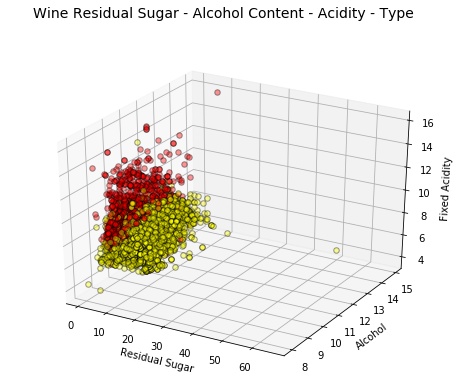

In [40]:
# FOUR DIMENSION (4-D)

# One way to visualize data in four dimensions is to use depth and hue as 
# specific data dimensions in a conventionall plot like a scatter plot

# leveraging the concepts of hue and depth

fig = plt.figure(figsize=(8, 6))
t  = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])

data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)] # zip tra ve mot doi tuong 
# zip ( la 1 iterator dang danh sach cac tuple ket hop voi cac phan tu tu cac iterator)

colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

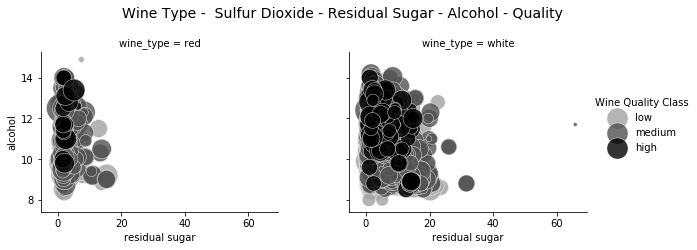

In [45]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and facets

g = sns.FacetGrid(wines, col='wine_type', hue='quality_label', col_order=['red','white'], hue_order=['low', 'medium', 'high'], aspect=1.2, height=3.5,
                 palette=sns.light_palette('black', 4)[1:])

g.map(plt.scatter, 'residual sugar', 'alcohol', alpha=0.8, edgecolor='white', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type -  Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l =  g.add_legend(title='Wine Quality Class')


Text(0.5, 0, 'Fixed Acidity')

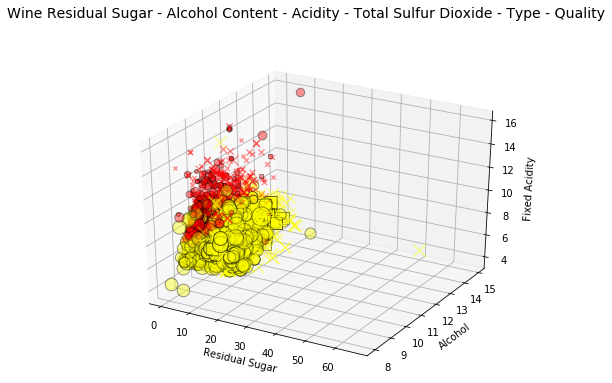

In [48]:
# Visualizing data in Six Dimension 6-D

# We leverage depth, hue, size, shape and regular 2 axes
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])

data_points= [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss  = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]


for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')
    